In [3]:
import matplotlib.pyplot as plt
import wandb
import torch
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from tqdm.auto import tqdm
from hydra.utils import instantiate


/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
names = {
    'SubstructureFingerprintCount': 'SSC',
    'PubchemFingerprinter': 'PubChem',
    'MACCSFingerprinter': 'MACCS',
    'KlekotaRothFingerprintCount': 'KRC',
    'EStateFingerprinter': 'E-state',
    'MolCLR_GIN_mean': 'MolCLR (mean)',
    'MoleBERT_mean': 'MoleBERT (mean)',
    'ChemBERTa_zinc250k_v2_40k_mean': 'ChemBERTa (mean)',
    'AtomPairs2DFingerprintCount': 'AP2DC',
    'KPGT_base': 'KPGT',
    'OptimizedFishToxFingerprinter': 'OFT'
}

order = [
    names['AtomPairs2DFingerprintCount'],
    names['EStateFingerprinter'],
    names['KlekotaRothFingerprintCount'],
    names['PubchemFingerprinter'],
    names['SubstructureFingerprintCount'],
    names['OptimizedFishToxFingerprinter'],
    names['ChemBERTa_zinc250k_v2_40k_mean'],
    names['MolCLR_GIN_mean'],
    names['MoleBERT_mean'],
    names['KPGT_base'],
]



In [3]:

run_info = []
results = []
# 
# runs = [run for run in api.sweep('mfederici/infomol/kt1gxnfu').runs]
# runs += [run for run in api.sweep('mfederici/infomol/s14it2rx').runs] #KPGT

runs = [run for run in api.sweep('mfederici/infomol/vndc3ra0').runs]

for run in tqdm(runs):
    if run.state != 'finished':
        print(run.id, run.state)
    else:
        hidden_dims = run.config['h_dim']
        encoder = instantiate(run.config['data']['encoder']).name
        dataset = run.config['data']['dataset']['_target_'].split('.')[-1]
        r_idx = run.id
        run_info.append({
            'hidden_dims': hidden_dims,
            'encoder': encoder,
            'dataset': dataset,
            'r_idx': r_idx,
        })
        run_results = run.history()
        run_results['r_idx'] = run.id
        results.append(run_results)
        
        
run_info = pd.DataFrame(run_info)
results = pd.concat(results)

  0%|          | 0/33 [00:00<?, ?it/s]

43lu78fd running


/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/torch_geometric/typing.py:47: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /lib/x86_64-linux-gnu/libm.so.6: version `GLIBC_2.29' not found (required by /home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/torch_geometric/typing.py:101: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /lib/x86_64-linux-gnu/libm.so.6: version `GLIBC_2.29' not found (required by /home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
 67%|██████▋   | 22/33 [00:19<00:17,  1.57s/it]

xta7rrzq failed
c4e2hy2d failed


 76%|███████▌  | 25/33 [00:20<00:06,  1.27it/s]

6yt6kond failed


 82%|████████▏ | 27/33 [00:20<00:03,  1.69it/s]

ai4wiw82 failed
ko3e5en9 failed
Instantiating the model.


/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/transformers/models/auto/modeling_auto.py:1581: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(
/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of the model checkpoint at seyonec/ChemBERTa_zinc250k_v2_40k were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']


In [5]:
run_info['encoder'].unique()

array(['SubstructureFingerprintCount', 'PubchemFingerprinter',
       'MACCSFingerprinter', 'OptimizedFishToxFingerprinter',
       'KlekotaRothFingerprintCount', 'EStateFingerprinter', 'KPGT_base',
       'MolCLR_GIN_mean', 'MoleBERT_mean',
       'ChemBERTa_zinc250k_v2_40k_mean', 'AtomPairs2DFingerprintCount'],
      dtype=object)

/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/marco/a

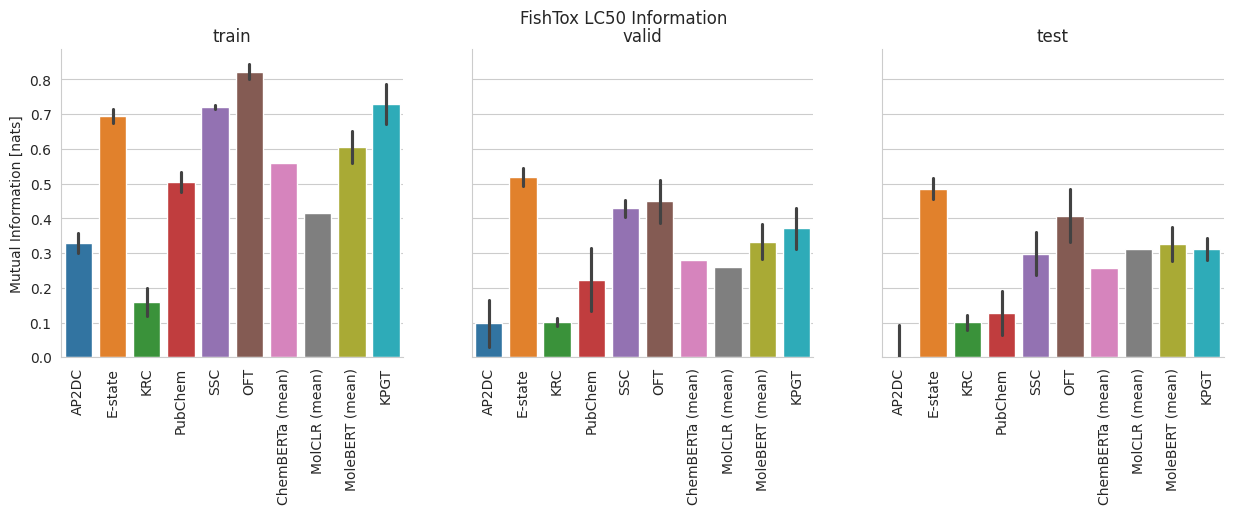

In [6]:
raw_data = run_info.merge(
    results[
        ['r_idx', 'train/mutual_information','valid/mutual_information','test/mutual_information']
    ].groupby(['r_idx']).mean(), on='r_idx'
)
data = raw_data
data['encoder'] = data['encoder'].replace(to_replace=names)

f, ax = plt.subplots(1,3, sharey=True, figsize=(15,4))
for i, split in enumerate(
    ['train', 'valid', 'test']
):
    sns.barplot(
        data, 
        x='encoder',hue='encoder', y=f'{split}/mutual_information', 
        errorbar='sd', ax=ax[i],
        order=order, hue_order=order,
    )
    ax[i].set_title(split)
    ax[i].set_ylabel('Mutual Information [nats]')
    ax[i].set_ylim(0)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
    ax[i].set_xlabel('')
f.suptitle('FishTox LC50 Information')
sns.despine()

In [4]:
run_info = []
raw_results = []
api = wandb.Api()
# FishTox Only
# runs = [run for run in api.sweep('mfederici/infomol/vndc3ra0').runs]
# Everything else
runs = [run for run in api.sweep('mfederici/infomol/f5wgm9zv').runs]

for run in tqdm(runs):
    if run.state != 'finished':
        print(run.id, run.state)
    else:
        encoder = instantiate(run.config['data']['encoder']).name
        dataset = run.config['data']['dataset']['name']
        r_idx = run.id
        run_info.append({
            'encoder': encoder,
            'dataset': dataset,
            'r_idx': r_idx,
        })
        run_results = run.history()
        run_results['r_idx'] = run.id
        raw_results.append(run_results)
        
        
run_info = pd.DataFrame(run_info)
raw_results = pd.concat(raw_results)

  0%|          | 0/198 [00:00<?, ?it/s]/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/torch_geometric/typing.py:47: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /lib/x86_64-linux-gnu/libm.so.6: version `GLIBC_2.29' not found (required by /home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/torch_geometric/typing.py:101: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /lib/x86_64-linux-gnu/libm.so.6: version `GLIBC_2.29' not found (required by /home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/libpyg.so)
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "
 14%|█▎        | 27/198 [00:25<02:02,  1.40it/s]/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/transformers/models/auto/modeling_auto.

In [5]:
results = raw_results.melt(id_vars=['r_idx','_runtime', 'iteration', '_timestamp', '_step', 'epoch'], var_name='split', value_name="mutual_information")
# Clean up the 'split' column to only contain "train", "valid", or "test"
results["split"] = results["split"].str.replace('/.*', '', regex=True)


In [6]:
print(len(results))
failed_runs = results[results['mutual_information'] == 'NaN']['r_idx'].unique()
results = results[results['mutual_information'] != 'NaN']
print(len(results))
results['mutual_information'] = pd.to_numeric(results['mutual_information'])
agg_results = results[
    ['r_idx', 'mutual_information', 'split']
].groupby(['r_idx', 'split']).mean().reset_index()

5940
4680


In [7]:
for r_idx in failed_runs:
    print(run_info[run_info['r_idx']==r_idx].values)

[['SubstructureFingerprintCount' 'SIDER' 'k08yggzb']]
[['SubstructureFingerprintCount' 'SIDER' '0t8f45s9']]
[['SubstructureFingerprintCount' 'SIDER' 'xl03jykd']]
[['PubchemFingerprinter' 'SIDER' '03n4serx']]
[['PubchemFingerprinter' 'SIDER' 'nbkjhj2b']]
[['PubchemFingerprinter' 'SIDER' '9039y23n']]
[['MACCSFingerprinter' 'SIDER' 'elgq3i0d']]
[['MACCSFingerprinter' 'SIDER' 'w1rodu6j']]
[['MACCSFingerprinter' 'SIDER' 'w89hkvpk']]
[['OptimizedFishToxFingerprinter' 'SIDER' 'q8nexavx']]
[['OptimizedFishToxFingerprinter' 'SIDER' 'mx3ez0pe']]
[['OptimizedFishToxFingerprinter' 'SIDER' 'unysaoh9']]
[['KlekotaRothFingerprintCount' 'SIDER' 'qi7tx7be']]
[['KlekotaRothFingerprintCount' 'SIDER' 'lnws5gz4']]
[['KlekotaRothFingerprintCount' 'SIDER' '19xcw1kz']]
[['KPGT_base' 'SIDER' 'udamchn6']]
[['KPGT_base' 'SIDER' 'fx47kfbk']]
[['KPGT_base' 'SIDER' 'gzsibrrb']]
[['ChemBERTa_zinc250k_v2_40k_mean' 'SIDER' 'btn4sg5a']]
[['ChemBERTa_zinc250k_v2_40k_mean' 'SIDER' 'aiqm4v9j']]
[['ChemBERTa_zinc250k_v2_40

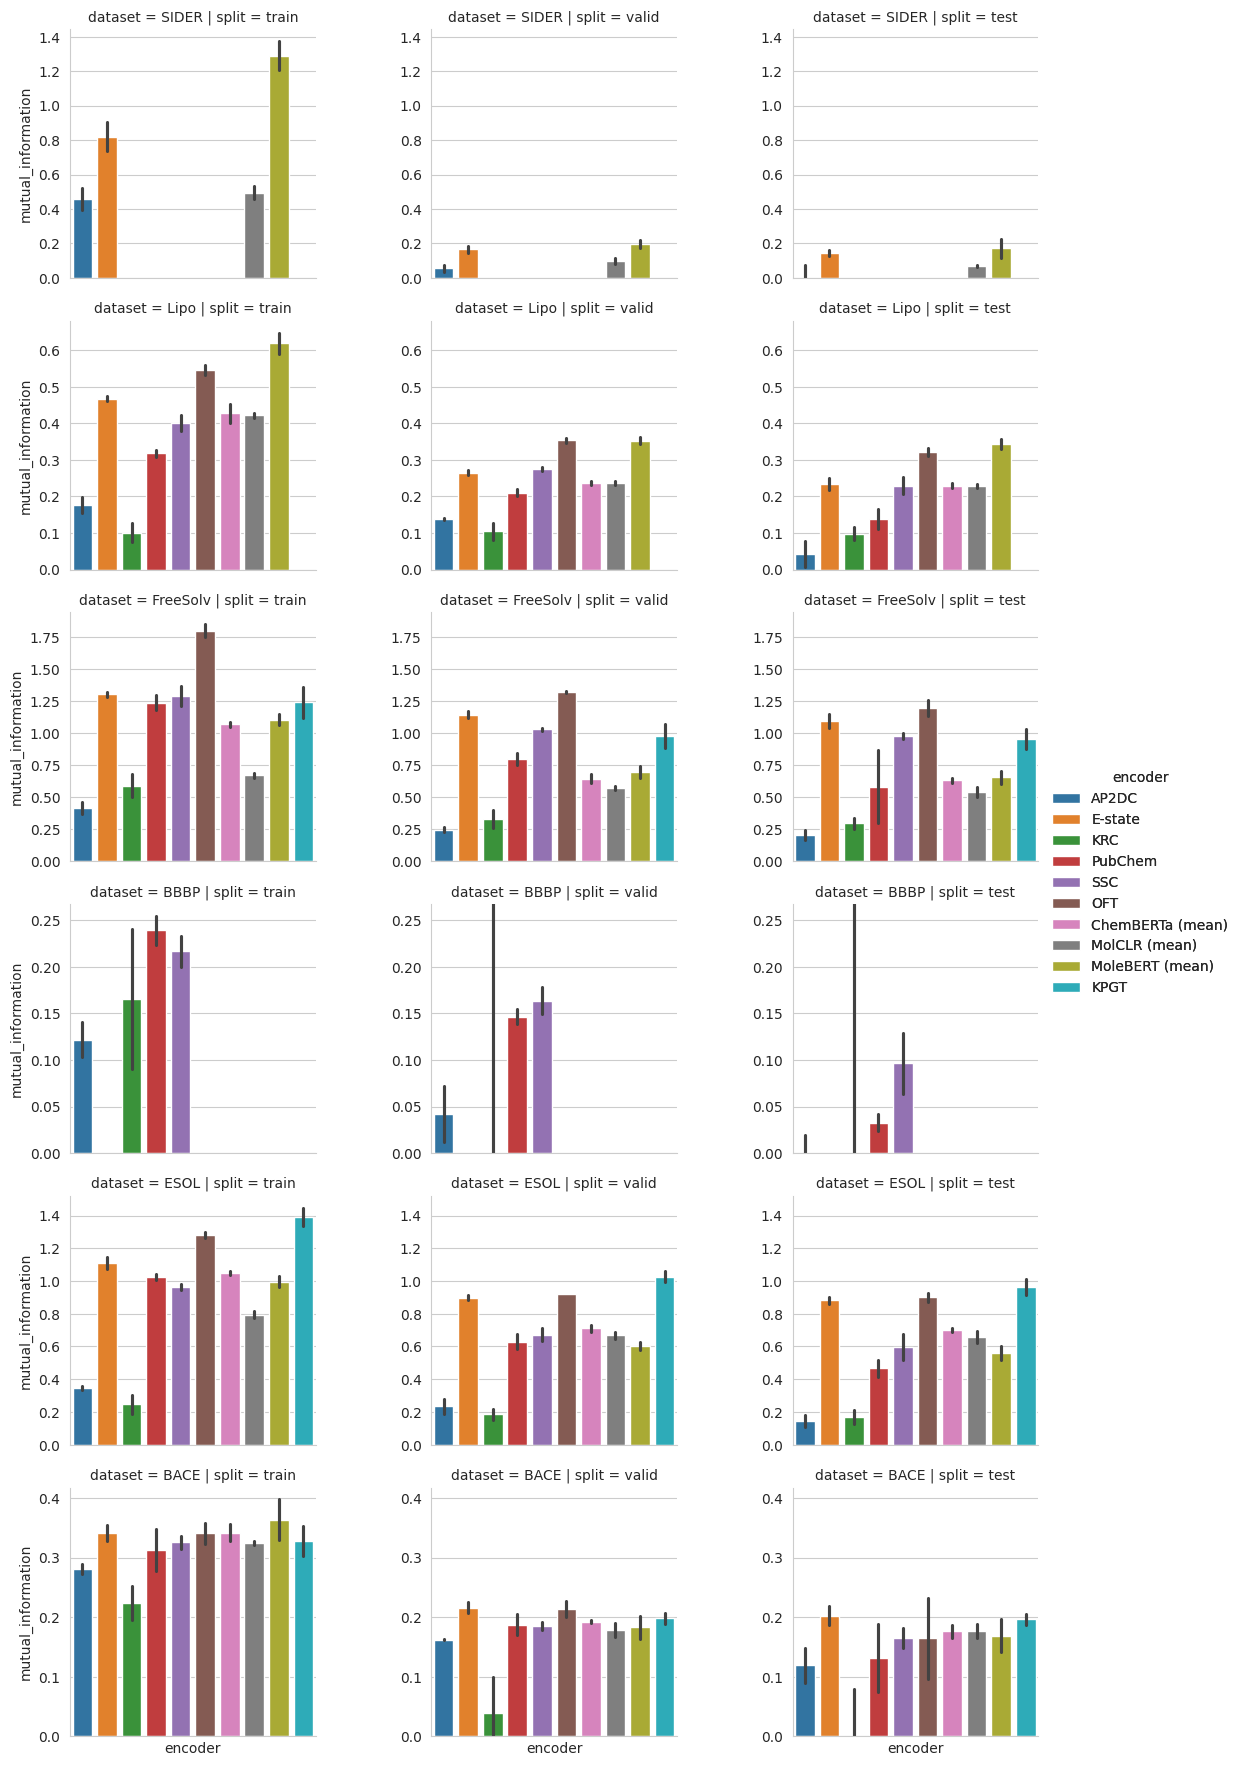

In [8]:
data = run_info.merge(
    agg_results, on='r_idx'
)
data['encoder'] = data['encoder'].replace(to_replace=names)


grid = sns.FacetGrid(
    data, 
    col='split', row='dataset', hue='encoder', 
    col_order=['train', 'valid', 'test'], 
    hue_order=order,
    sharey=False,
)
grid.map(sns.barplot, 'encoder', 'mutual_information', order=order, errorbar='sd')

for i in range(grid.axes.shape[0]):
    for j in range(grid.axes.shape[1]):
        grid.axes[i,j].set_ylim(0,grid.axes[i,0].get_ylim()[1])
grid.add_legend()

for ax in grid.axes[-1,:]:
    ax.set_xticks([])
grid.add_legend()

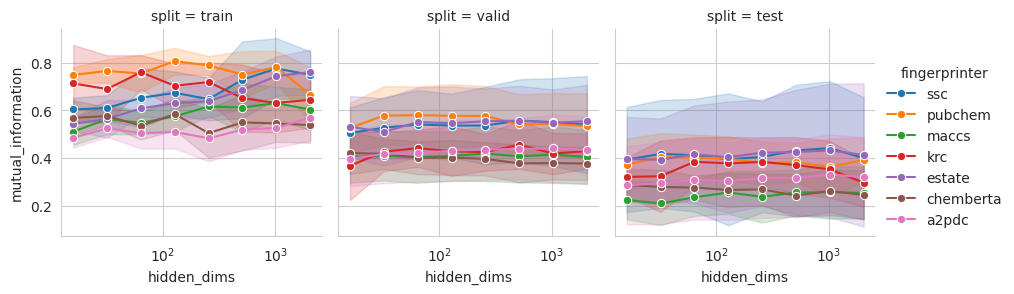

In [72]:
grid = sns.FacetGrid(run_info.merge(results, on='r_idx'), hue='fingerprinter', col='split')
grid.map(sns.lineplot, 'hidden_dims', 'mutual_information', marker='o', errorbar='sd')
grid.axes[0,0].set_xscale('log')
grid.add_legend()
plt.savefig('figures/fishtox_hidden_dims.png')

/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/tmp/ipykernel_28470/2943591839.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_28470/2943591839.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_28470/2943591839.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


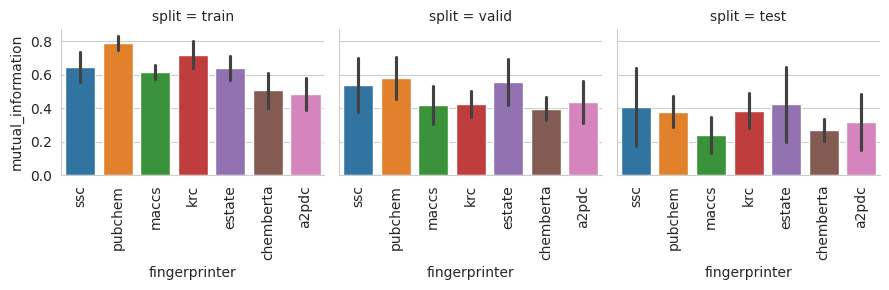

In [75]:
J = run_info.merge(results, on='r_idx')
J = J[J['hidden_dims']==256]
grid = sns.FacetGrid(J, hue='fingerprinter', col='split')
grid.map(sns.barplot, 'fingerprinter', 'mutual_information', errorbar='sd')
for ax in grid.axes[0]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig('figures/fishtox_base.png')

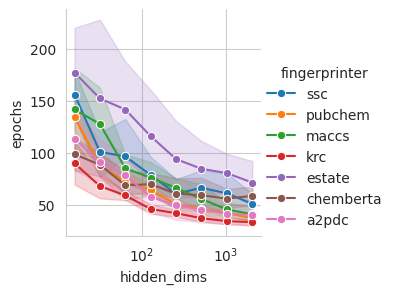

In [26]:
grid = sns.FacetGrid(results, hue='fingerprinter')
grid.map(sns.lineplot, 'hidden_dims', 'epochs', marker='o', errorbar='sd')
grid.axes[0,0].set_xscale('log')
grid.add_legend()
plt.savefig('figures/fishtox_training_time.png')

In [58]:

d

{'valid/mutual_information': 0.4677644148468971, 'epoch': 137}

In [56]:
d = [r for r in run.scan_history(keys=['valid/mutual_information', 'epoch'], min_step=min_step, max_step=min_step+iterations_per_epoch[dataset])]
d, run.summary['epoch']-patience

([{'valid/mutual_information': 0.4677644148468971, 'epoch': 137}], 137)

In [43]:
min_step, max_step

(1644, 1668)

In [5]:

run_info = []
results = []

runs = [run for run in api.sweep('mfederici/infomol/zmv727rt').runs]


dataset = "SIDER"
for run in tqdm(runs):
    if run.state != 'finished':
        print(run.id, run.state)
    else:
        hidden_dims = run.config['h_dim']
        fold = run.config['fold']
        encoder = run.config['fingerprinter']
        r_idx = run.id
        
        epochs = run.summary['epoch']
        iterations = run.summary['iteration']
        patience = run.config['estimation']['patience']
        min_step = (epochs-patience)*iterations_per_epoch[dataset]
        valid_mi = next(
            run.scan_history(
                keys=['valid/mutual_information', 'epoch'], 
                min_step=min_step, max_step=min_step+iterations_per_epoch[dataset])
        )['valid/mutual_information']
        
        train_mi = next(
            run.scan_history(
                keys=['train/mutual_information', 'epoch'], 
                min_step=min_step, max_step=min_step+100)
        )['train/mutual_information']
        
        run_info.append({
            'hidden_dims': hidden_dims,
            'fold': fold,
            'fingerprinter': encoder,
            'dataset': dataset,
            'r_idx': r_idx,
            'epochs': epochs-patience,
            'iterations': iterations-patience*iterations_per_epoch[dataset]
        })
        
        test_mi = run.summary['test/mutual_information']
        
        for split, value in [
            ('train', train_mi), 
            ('valid', valid_mi), 
            ('test', test_mi)
        ]:
            results.append({
                'r_idx': r_idx,
                'split': split,
                'mutual_information': value
            })
        
run_info = pd.DataFrame(run_info)
results = pd.DataFrame(results)

100%|██████████| 282/282 [04:17<00:00,  1.10it/s]


In [7]:
# run_info.to_csv('cached_results/sider_base_run_info.csv')
# results.to_csv('cached_results/sider_base_results.csv')

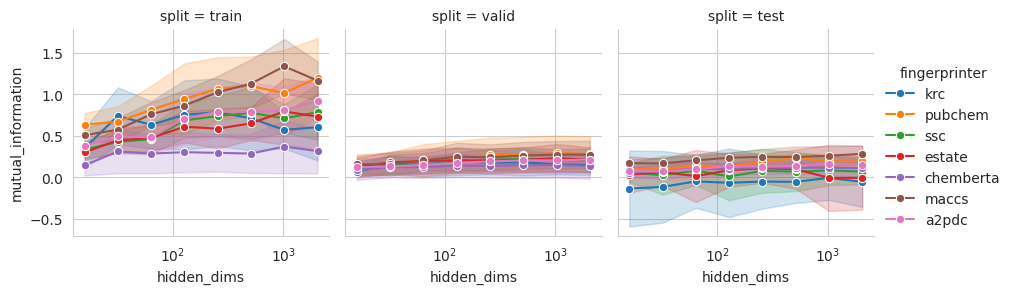

In [8]:
grid = sns.FacetGrid(run_info.merge(results, on='r_idx'), hue='fingerprinter', col='split')
grid.map(sns.lineplot, 'hidden_dims', 'mutual_information', marker='o', errorbar='sd')
grid.axes[0,0].set_xscale('log')
grid.add_legend()
plt.savefig('figures/sider_hidden_dims.png')

/home/marco/anaconda3/envs/InfoMol/lib/python3.9/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/tmp/ipykernel_4037/1956597602.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_4037/1956597602.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_4037/1956597602.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


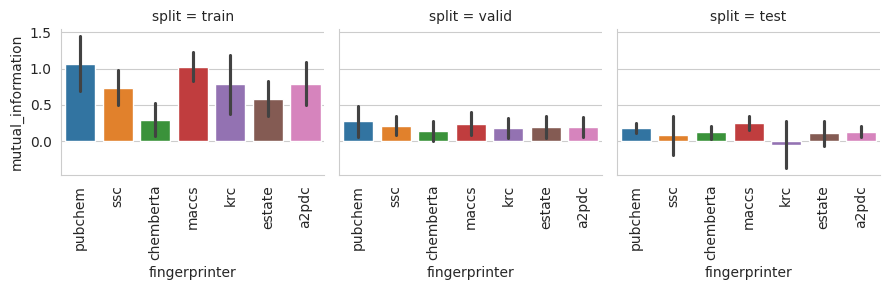

In [9]:
J = run_info.merge(results, on='r_idx')
J = J[J['hidden_dims']==256]
grid = sns.FacetGrid(J, hue='fingerprinter', col='split')
grid.map(sns.barplot, 'fingerprinter', 'mutual_information', errorbar='sd')
for ax in grid.axes[0]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig('figures/sider_base.png')